<a href="https://colab.research.google.com/github/Coreight98/Paran_ajou_Project_Anything/blob/main/Pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 2021 AJOU_UNIV 파란학기 Anything 패턴 이미지 처리 모델 ##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import PIL
import time
from sklearn.neighbors import KNeighborsClassifier

--Train Images--
Num of All Images:  1281
cuda 로 학습

Tensor to np


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:136: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


321
[[  47  181  550 1032]]
47
find!
tensor([[0.6078, 0.6078, 0.6078,  ..., 0.6078, 0.6078, 0.6078],
        [0.6078, 0.6078, 0.6078,  ..., 0.6078, 0.6078, 0.6078],
        [0.6078, 0.6078, 0.6078,  ..., 0.6078, 0.6078, 0.6078],
        ...,
        [0.6000, 0.6000, 0.6000,  ..., 0.6078, 0.6078, 0.6078],
        [0.6000, 0.6000, 0.6000,  ..., 0.6078, 0.6078, 0.6078],
        [0.6000, 0.6000, 0.6000,  ..., 0.6078, 0.6078, 0.6078]])
find!
tensor([[ 0.1529,  0.1529,  0.1608,  ..., -0.1529, -0.1608, -0.1608],
        [ 0.0980,  0.1059,  0.1137,  ..., -0.1765, -0.1843, -0.1843],
        [-0.0353, -0.0196,  0.0039,  ..., -0.2314, -0.2392, -0.2392],
        ...,
        [-0.2314, -0.2392, -0.2471,  ..., -0.1529, -0.0980, -0.0745],
        [-0.1294, -0.1373, -0.1529,  ..., -0.0980, -0.0431, -0.0196],
        [-0.0902, -0.0980, -0.1137,  ..., -0.0667, -0.0118,  0.0118]])
find!
tensor([[-0.2784, -0.2627, -0.2314,  ..., -0.7333, -0.7020, -0.6863],
        [-0.3176, -0.3020, -0.2706,  ..., -0.7412

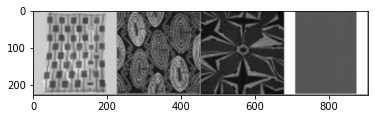

In [ ]:
train_location = './drive/MyDrive/data/pattern/'
# test_location = './drive/MyDrive/data/img/val/'

class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 8, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(8, 16, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 
        self.fc = torch.nn.Linear(50176, 5, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

class PatternDataset():
    def __init__(self, image, mode, transforms):
        super().__init__()
        self.image = image
        self.mode = mode
        self.transforms = transforms

    def __getitem__(self, index):
        image_name = self.image[index]
        image = Image.open(train_location + image_name)
        image = image.resize((224,224))

        if self.mode == 'train' :
            image = self.transforms(image)
            label=1
            return image,label
        elif self.mode == 'test':
            image = self.transforms(image)
            label=1
            return image, label

    def __len__(self):
        return len(self.image)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

if __name__ == '__main__':
    #데이터 셋 불러오고 정규화
    transform = transforms.Compose(
        [transforms.Grayscale(num_output_channels=1),
         transforms.ToTensor(),
          transforms.Normalize((0.5),(0.5))
          ]
    )

    train_images = os.listdir(train_location)
    # test_images = os.listdir(test_location)
    print("--Train Images--")
    print("Num of All Images: ", len(train_images))

    # 데이터 셋 생성
    train_dataset = PatternDataset(train_images, mode='train', transforms=transform)
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)

    net = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print (device,"로 학습")

    # 신경망 학습하기
    # for epoch in range(2):
    #    running_loss = 0.0
    #    for i, data in enumerate(trainloader,0):
    #        inputs, labels = data  # data입력
    #        optimizer.zero_grad()  # gradient 매개변수를 0으로 만듬
    #        # 순전파 + 역전파 + 최적화
    #        outputs = net(inputs)
    #        loss = criterion(outputs, labels)
    #        loss.backward()
    #        optimizer.step()
    #        #통계출력
    #        running_loss += loss.item()
    #        if i % 200 == 199:
    #            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
    #            running_loss = 0.0
    # print('Finished Training')
    PATH = './drive/MyDrive/data/Pattern_net.pth'
    # torch.save(net, PATH)

    ######################KNN##################################################
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    net = torch.load(PATH)
    net.eval()

    #Input 사진
    # from IPython.display import Image
    # img=Image('./drive/MyDrive/data/pattern/0001.jpg')
    # display(img)

    #img를 net에 넣는 방법?
    ##################승준씨 여기부터요###############################

    #tensor -> np (train)
    print("\nTensor to np")
    X = np.empty((0, 4), dtype=int)
    Y = np.empty((0,4),dtype=int)
    for data in trainloader:
      images, labels = data
      outputs = net(images)
      X = np.append(X,outputs.detach().numpy())
      Y = np.append(Y,labels.numpy())
    X = np.reshape(X,(1281,5)) #1281개 5개tensor
    Y = np.reshape(Y,(1281,1)) #1281개 1개label
    # print("Image size",images.shape)
    #np knn
    reg = KNeighborsClassifier(n_neighbors=4)
    reg.fit(X,Y)
    l = reg.kneighbors([[0,0,0,0,0]],n_neighbors=4,return_distance=False) #이미지 입력부분 (np)
    l.sort()
    for i in l:
      temp = np.empty((0,4),dtype=int)
      temp = np.append(temp, X[i])
    temp = np.reshape(temp,(4,5)) #4개 5개tensor(np)
    # print(temp) #가장 가까운 이미지 4개 출력(np)

    #np -> tensor 
    # result = torch.tensor(temp)
    # print(result)

    dataiter = iter(trainloader)
    print(len(dataiter))
    count = 0
    print(l)
    print(l[0][0])
    index=0
    
    images = torch.empty(4,1,224,224)
    
    while(index<4):
      if count < l[0][index]:
        img=dataiter.next()
        count+=4
      else:
        print("find!")
        #l[0][index]-count 한 값을 인덱스로 dataiter에서 출력
        print(img[0][l[0][index]-count][0])
        images[index][0] = img[0][l[0][index]-count][0]
        dataiter.next()
        count+=4
        index+=1
    #이미지 출력
    imshow(torchvision.utils.make_grid(images))
